### 目的

预测波士顿地区的房价

### 回归树

树上的每个叶子不再代表类型，而是一个数字。

- 分类树中，若在一个叶子上，有15个`true`和5个`false`，则该叶子上有值`15/(15+5)=0.75`。若门槛为0.5，则称该叶子上的值为`true`。
- 回归树中，若在一个叶子上，有值3,4和5，则该叶子的值为4（3,4,5的均值）。

### 数据

- LON, LAT: 经纬度
- MEDV: 房价中位数
- CRIM: 犯罪率
- ZN: 住宅占地
- INDUS: 工业占地
- CHAS: 是否在Charles河边
- NOX: 空气污染指标
- RM: 平均居室数
- AGE: 老房子比重
- DIS: 与波士顿市中心的距离
- RAD: 与高速公路的距离
- TAX: 税率
- RTRATIO: 学生-老师比率

In [1]:
boston = read.csv("./data/boston.csv")

In [2]:
str(boston)

'data.frame':	506 obs. of  16 variables:
 $ TOWN   : Factor w/ 92 levels "Arlington","Ashland",..: 54 77 77 46 46 46 69 69 69 69 ...
 $ TRACT  : int  2011 2021 2022 2031 2032 2033 2041 2042 2043 2044 ...
 $ LON    : num  -71 -71 -70.9 -70.9 -70.9 ...
 $ LAT    : num  42.3 42.3 42.3 42.3 42.3 ...
 $ MEDV   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 22.1 16.5 18.9 ...
 $ CRIM   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ ZN     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ INDUS  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ CHAS   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ NOX    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ RM     : num  6.58 6.42 7.18 7 7.15 ...
 $ AGE    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ DIS    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ RAD    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ TAX    : int  296 242 242 222 222 222 311 311 311 311 ...
 $ PTRATIO: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.

In [3]:
summary(boston$NOX)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.3850  0.4490  0.5380  0.5547  0.6240  0.8710 

空心点密集处是波士顿市中心。`points`用于在已有的图上增加新图画。蓝色点代表位于Charles河边。参数`pch`控制“点是如何被绘制的”，`pch=19`代表实心点。红色点代表MIT。

研究空气污染（NOX）如何影响房价。通过`summary`发现`NOX`的中间值大概在0.55，于是绘出高于中间值的绿点。发现绿点位于空心点最密集的波士顿市中心。不难理解，因为市中心车最多，所以空气污染应该是最严重的。

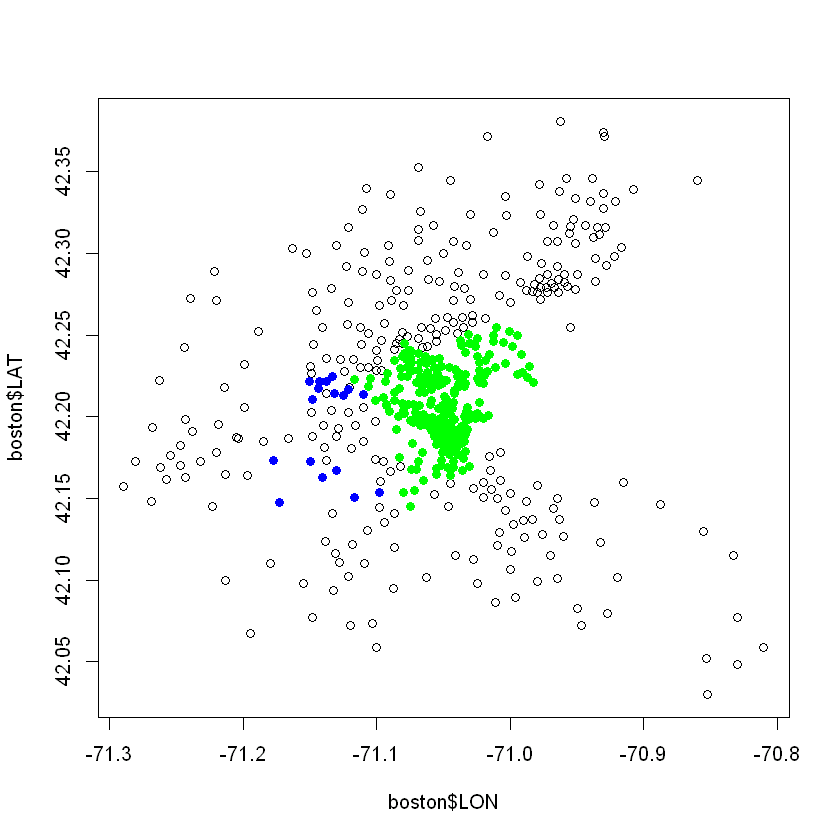

In [4]:
plot(boston$LON, boston$LAT)
points(boston$LON[boston$CHAS==1], boston$LAT[boston$CHAS==1], col="blue", pch=19)
points(boston$LON[boston$TRACT==3531], boston$LAT[boston$TRACT==3531], col="red", pch=19)
points(boston$LON[boston$NOX>=0.55], boston$LAT[boston$NOX>=0.55], col="green", pch=19)

红点表示房价高于均值的房子。

In [5]:
summary(boston$MEDV)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5.00   17.02   21.20   22.53   25.00   50.00 

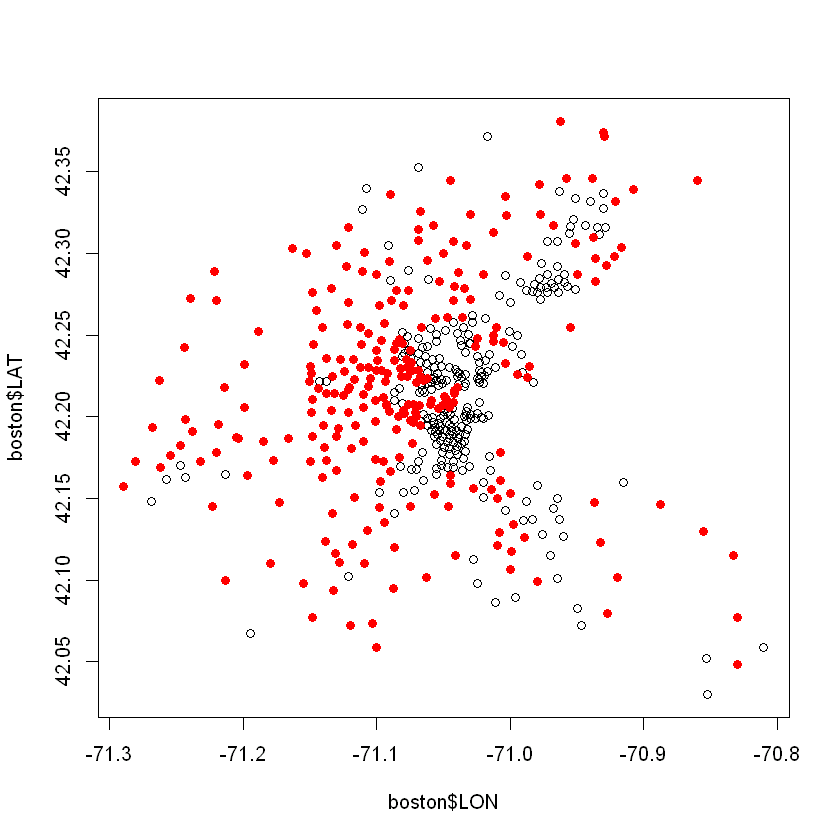

In [6]:
plot(boston$LON, boston$LAT)
points(boston$LON[boston$MEDV>=21.2], boston$LAT[boston$MEDV>=21.2], col="red", pch=19)

但该图的模式并不很清晰，因此仅仅用经纬度对房价进行线性回归得到的结果肯定比较糟糕。分别看看精度、维度和房价的关系。

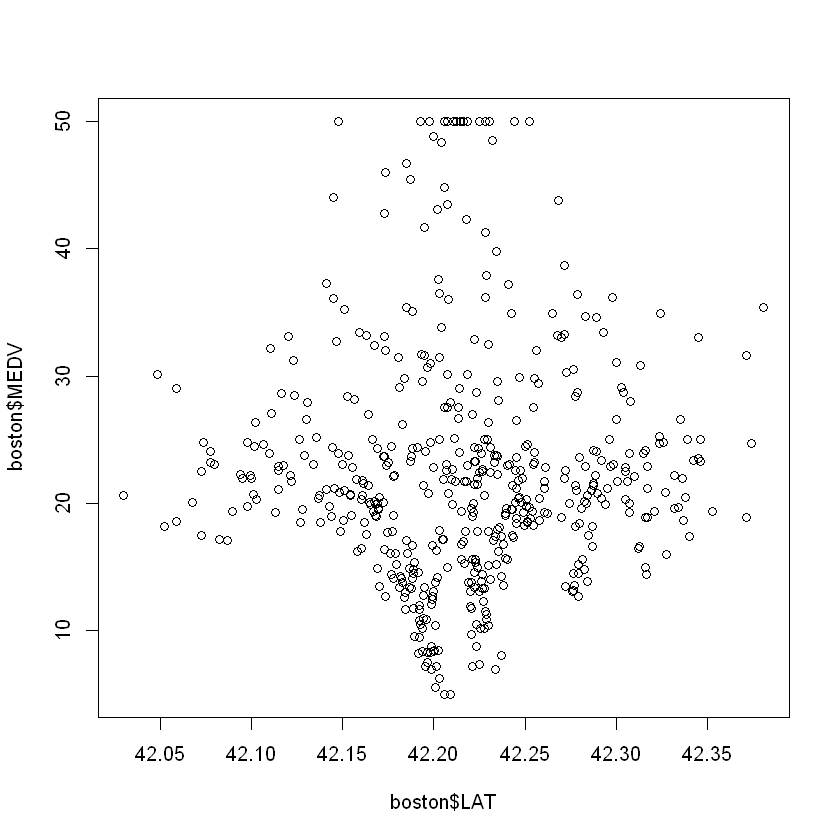

In [7]:
plot(boston$LAT, boston$MEDV)

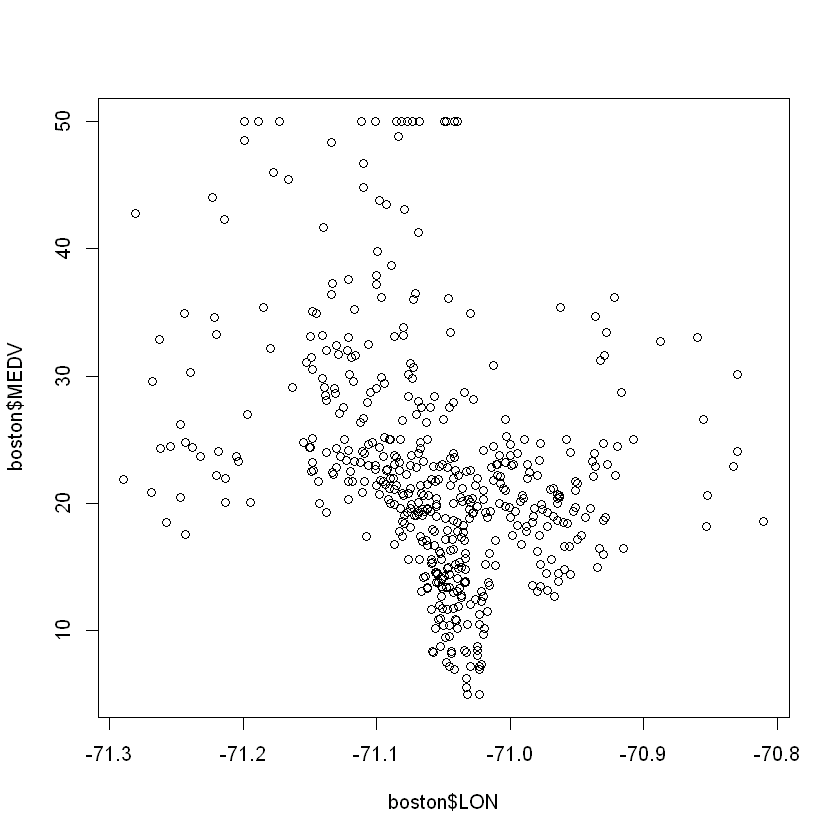

In [8]:
plot(boston$LON, boston$MEDV)

果然看不出线性的关系。跑个回归看看。

In [9]:
latlonlm = lm(MEDV ~ LAT + LON, data=boston)
summary(latlonlm)


Call:
lm(formula = MEDV ~ LAT + LON, data = boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-16.460  -5.590  -1.299   3.695  28.129 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3178.472    484.937  -6.554 1.39e-10 ***
LAT             8.046      6.327   1.272    0.204    
LON           -40.268      5.184  -7.768 4.50e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.693 on 503 degrees of freedom
Multiple R-squared:  0.1072,	Adjusted R-squared:  0.1036 
F-statistic: 30.19 on 2 and 503 DF,  p-value: 4.159e-13


线性模型告诉我们，越往东，房价越低，关系是线性的。红色点是样本中，房价高于中间值的。蓝色$符号是房价被线性回归模型预测为高于中间值的。从匹配的结果来看，线性回归模型显然不是一个好模型。

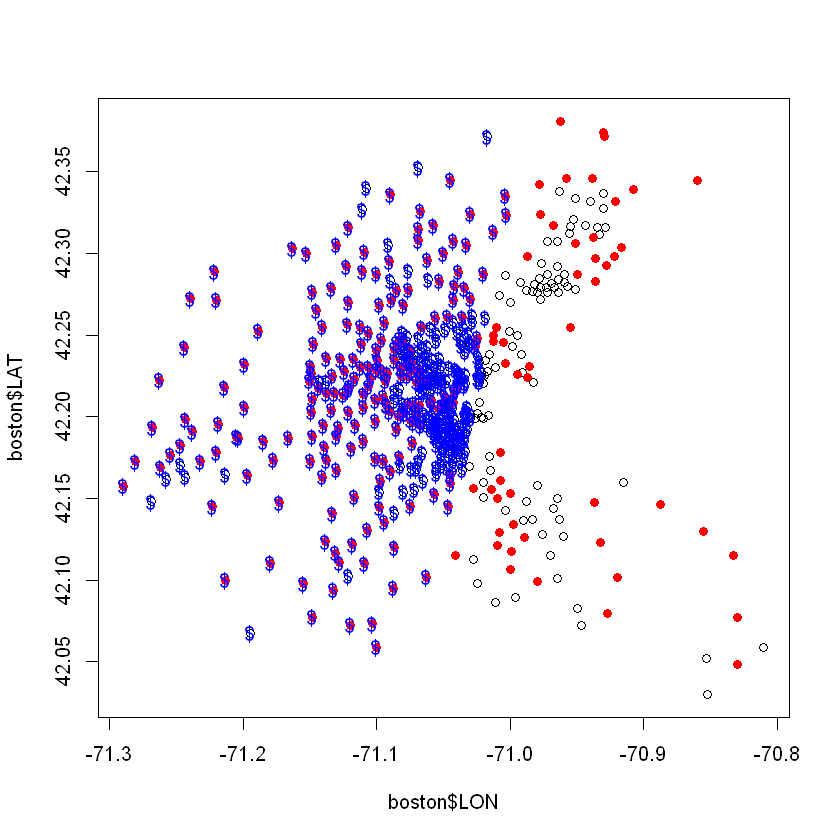

In [10]:
plot(boston$LON, boston$LAT)
points(boston$LON[boston$MEDV>=21.2], boston$LAT[boston$MEDV>=21.2], col="red", pch=19)
points(boston$LON[latlonlm$fitted.values>=21.2], boston$LAT[latlonlm$fitted.values>=21.2], col="blue", pch="$")

使用回归树。

In [11]:
library(rpart)
library(rpart.plot)

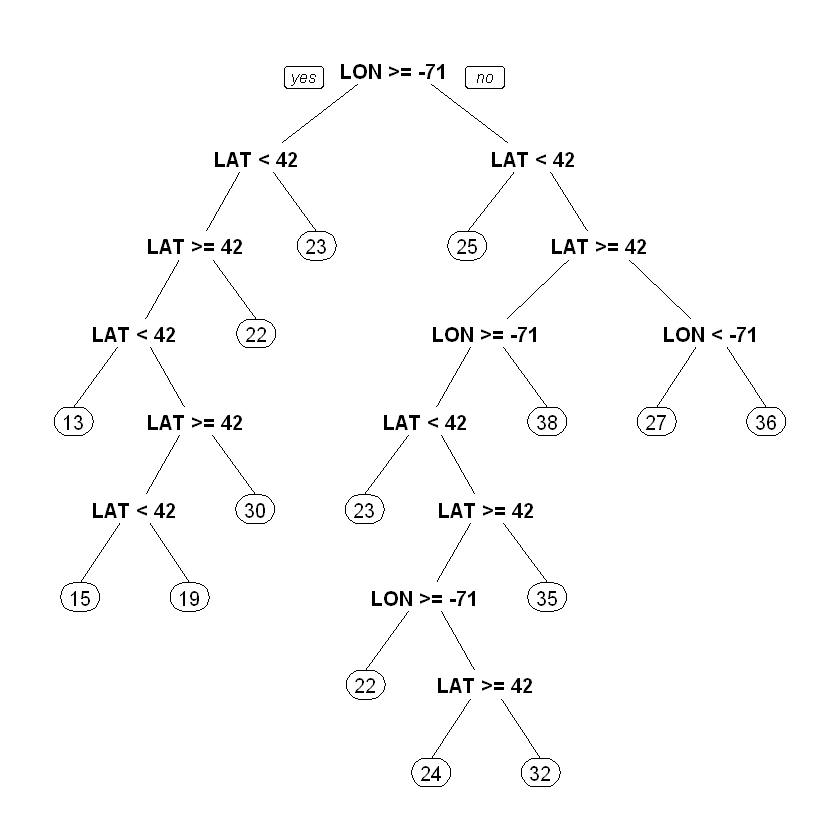

In [12]:
latlontree = rpart(MEDV ~ LAT + LON, data=boston)
prp(latlontree)

叶子上显示的是预测出来的数值，the average of the median house prices in that bucket or leaf.结果比线性回归好得多，但这棵树太复杂了。

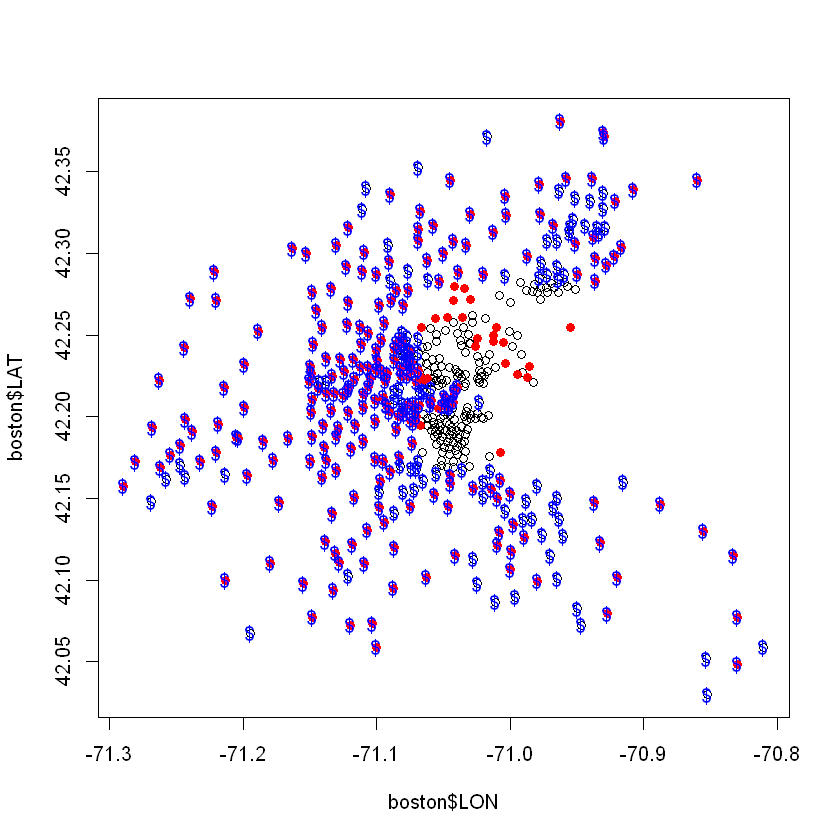

In [13]:
plot(boston$LON, boston$LAT)
points(boston$LON[boston$MEDV>=21.2], boston$LAT[boston$MEDV>=21.2], col="red", pch=19)
fittedvalues = predict(latlontree)
points(boston$LON[fittedvalues>=21.2], boston$LAT[fittedvalues>=21.2], col="blue", pch="$")

通过设置`minbucket`降低树的复杂程度。这里用到`prp`之外的另一种画树的方法。

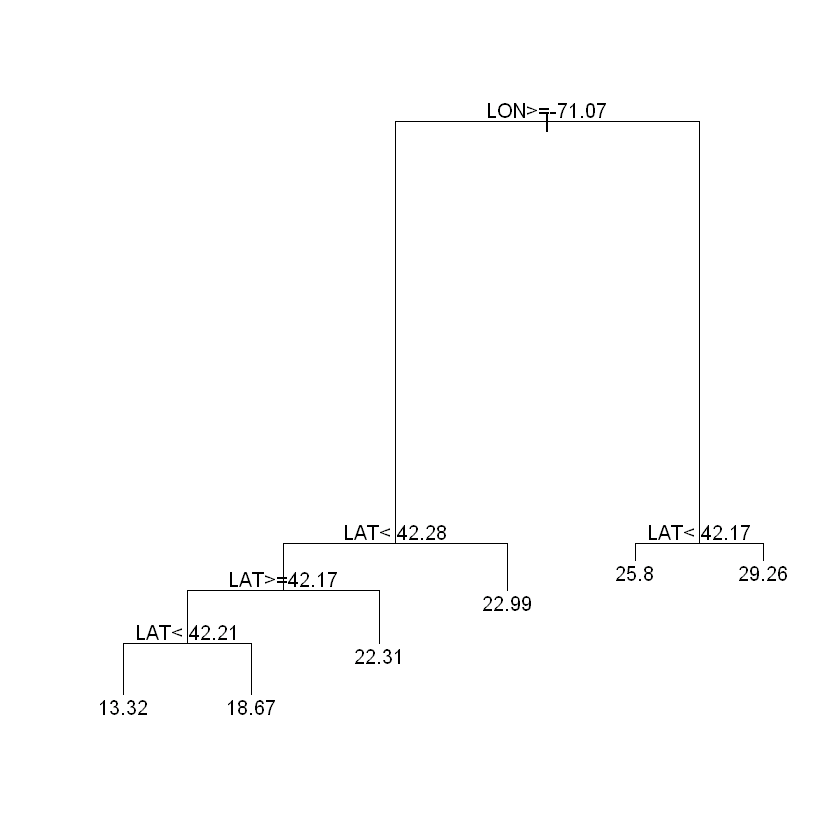

In [14]:
latlontree = rpart(MEDV ~ LAT + LON, data=boston, minbucket=50)
plot(latlontree)
text(latlontree)

关注预测房价最低的区域，即树的左下角。发现该矩形对应于实际房价很低的南波士顿地区（右边三个矩阵的中间那个）。

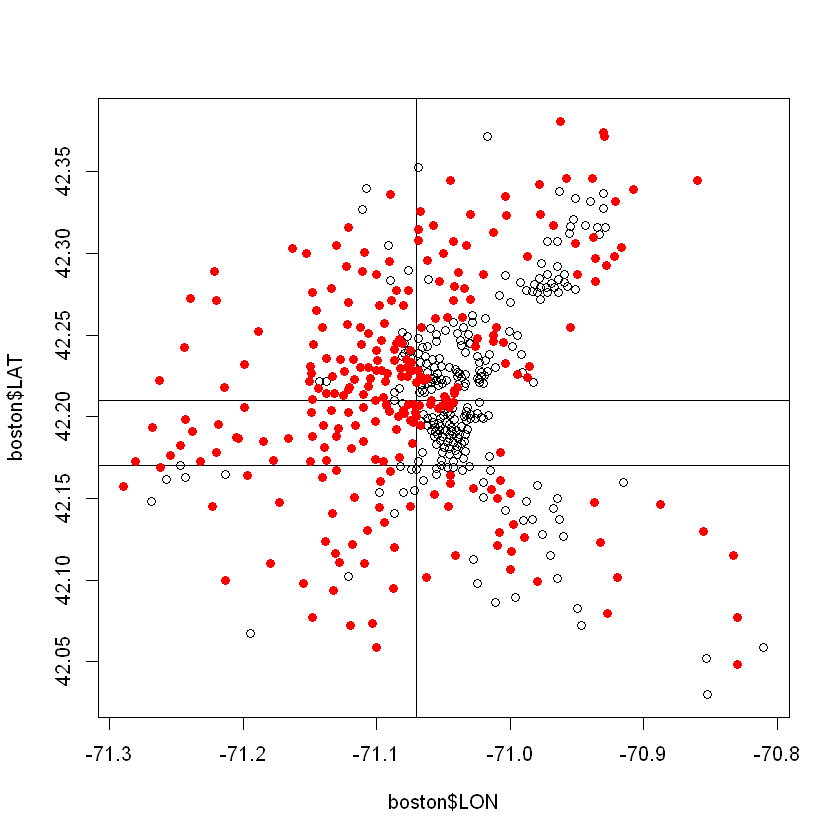

In [15]:
plot(boston$LON, boston$LAT)
abline(v=-71.07)
abline(h=42.17)
abline(h=42.21)
points(boston$LON[boston$MEDV>=21.2], boston$LAT[boston$MEDV>=21.2], col="red", pch=19)

上面的例子说明了回归树可以做到线性回归做不到的事情。下面将所有变量一起用于房价预测。

In [16]:
library(caTools)
set.seed(123)
split = sample.split(boston$MEDV, SplitRatio=0.7)
train = subset(boston, split==TRUE)
test = subset(boston, split==FALSE)

In [17]:
linreg = lm(MEDV ~ LAT + LON + CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO, data=train)
summary(linreg)


Call:
lm(formula = MEDV ~ LAT + LON + CRIM + ZN + INDUS + CHAS + NOX + 
    RM + AGE + DIS + RAD + TAX + PTRATIO, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-14.511  -2.712  -0.676   1.793  36.883 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.523e+02  4.367e+02  -0.578   0.5638    
LAT          1.544e+00  5.192e+00   0.297   0.7664    
LON         -2.987e+00  4.786e+00  -0.624   0.5329    
CRIM        -1.808e-01  4.390e-02  -4.118 4.77e-05 ***
ZN           3.250e-02  1.877e-02   1.731   0.0843 .  
INDUS       -4.297e-02  8.473e-02  -0.507   0.6124    
CHAS         2.904e+00  1.220e+00   2.380   0.0178 *  
NOX         -2.161e+01  5.414e+00  -3.992 7.98e-05 ***
RM           6.284e+00  4.827e-01  13.019  < 2e-16 ***
AGE         -4.430e-02  1.785e-02  -2.482   0.0135 *  
DIS         -1.577e+00  2.842e-01  -5.551 5.63e-08 ***
RAD          2.451e-01  9.728e-02   2.519   0.0122 *  
TAX         -1.112e-02  5.452e-03  -2.040   0.0

In [18]:
linreg.pred = predict(linreg, newdata=test)
linreg.sse = sum((linreg.pred - test$MEDV)^2)
linreg.sse

[1] 3037.088

回归树在SSE上能否战胜线性回归？先创建回归树，发现居室数量多次出现，可见很“非线性”。

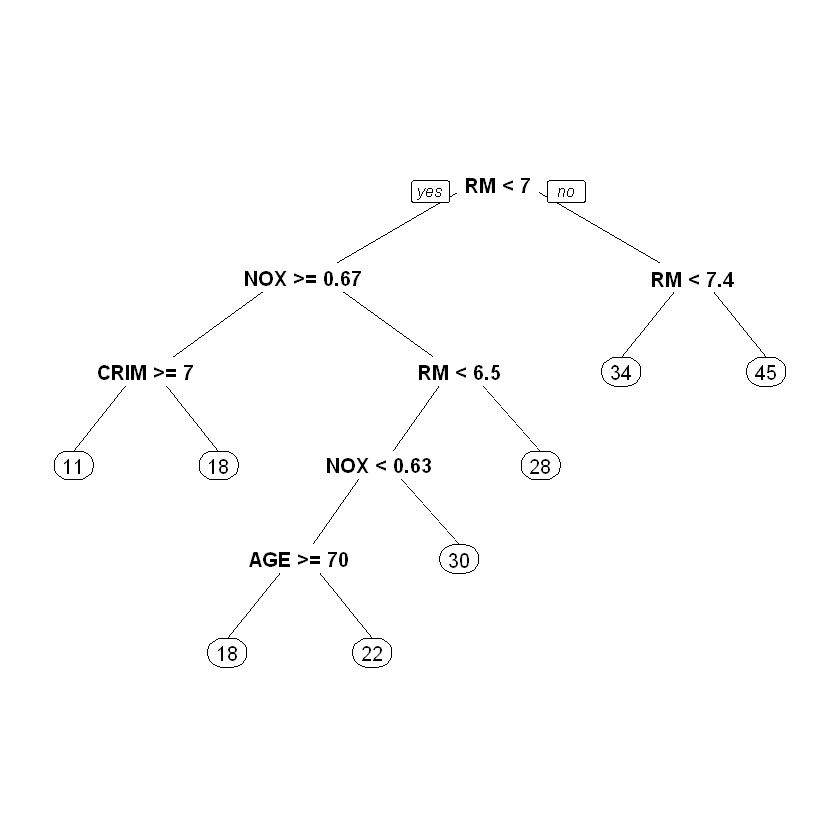

In [19]:
tree = rpart(MEDV ~ LAT + LON + CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO, data=train)
prp(tree)

In [20]:
tree.pred = predict(tree, newdata=test)
tree.sse = sum((tree.pred-test$MEDV)^2)
tree.sse

[1] 4328.988

结果反而更糟了。使用交叉验证优化这棵树。

**cp**

树的目标是用尽量少的分叉来获得尽可能小的分类误差$RSS = \sum_{i=1}^n(y_i-f(x_i))^2$。通过对分叉进行惩罚来做到这一点，即将目标函数设置为“找到一棵树使得它能最小化如下函数”：

$$\sum_{leaves}(RSS-at-each-leaf) + \lambda S$$

前面提到的cp为：

$$c_p = \frac{\lambda}{RSS(no-splits)}$$

显然，小cp鼓励大树（惩罚小），大cp鼓励小树（惩罚大）。

下面使用交叉验证。

In [21]:
library(caret)
library(e1071)
tr.control = trainControl(method="cv", number=10)
cp.grid = expand.grid(.cp = (0:10)*0.001)
tr = train(MEDV ~ LAT + LON + CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO, data=train, method="rpart", trControl=tr.control, tuneGrid=cp.grid)
tr

Loading required package: lattice
Loading required package: ggplot2


CART 

364 samples
 15 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 328, 327, 329, 328, 327, 328, ... 
Resampling results across tuning parameters:

  cp     RMSE      Rsquared 
  0.000  4.795661  0.7251433
  0.001  4.808653  0.7241589
  0.002  4.843092  0.7203932
  0.003  4.855853  0.7187000
  0.004  4.992709  0.7032541
  0.005  4.984651  0.7008777
  0.006  5.018776  0.6955937
  0.007  4.994024  0.6980549
  0.008  5.017056  0.6951007
  0.009  4.989958  0.6965547
  0.010  4.989958  0.6965547

RMSE was used to select the optimal model using  the smallest value.
The final value used for the model was cp = 0. 

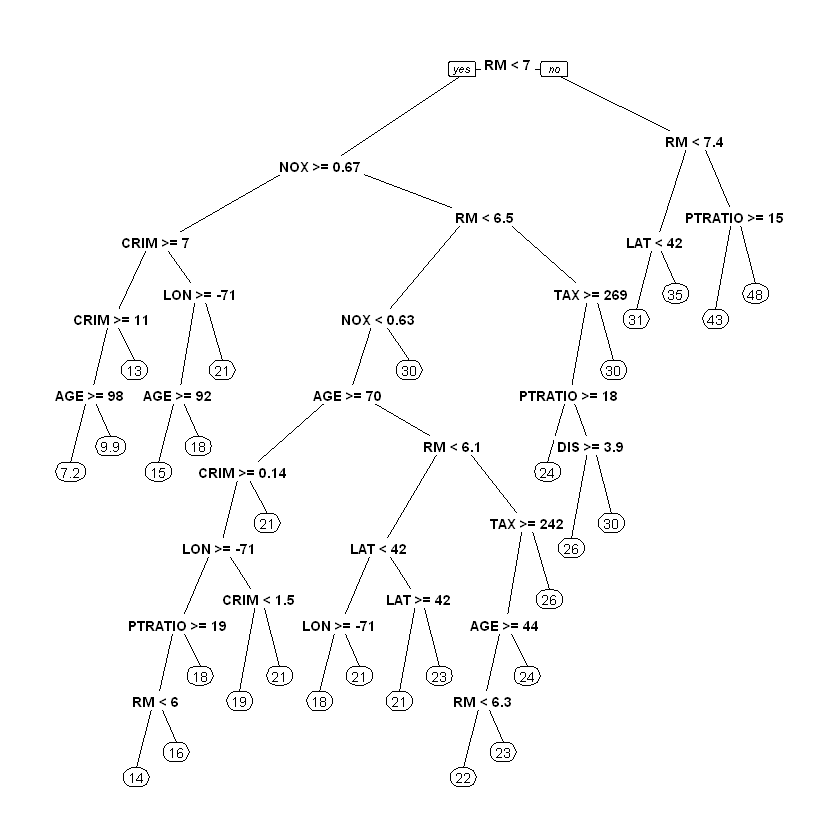

In [22]:
best.tree = tr$finalModel
prp(best.tree)

In [24]:
best.tree.pred = predict(best.tree, newdata=test)
best.tree.sse = sum((best.tree.pred - test$MEDV)^2)
best.tree.sse

[1] 3660.149

最好的树比刚刚的树要好，但仍不如线性回归。